Taken from Kaggle Placement DataSet:
https://www.kaggle.com/mayurdalvi/simple-linear-regression-placement-data

In [ ]:
!gdown --id 1P87LrNSrHDtpwFdzxl8oz6HHNSsNqaUl

Downloading...
From: https://drive.google.com/uc?id=1P87LrNSrHDtpwFdzxl8oz6HHNSsNqaUl
To: /content/placement.csv
100% 12.9k/12.9k [00:00<00:00, 31.1MB/s]


In [ ]:
!rm -rf sample_data

In [ ]:
import pandas as pd
import numpy as np
df_pl=pd.read_csv('placement.csv', sep=',')
df_pl

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

In [ ]:
np_pl_x = np.array(df_pl.iloc[:,0])
np_pl_y = np.array(df_pl.iloc[:,1])

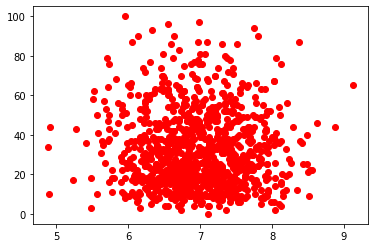

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_pl.iloc[:,0],df_pl.iloc[:,1],'ro')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df_pl.iloc[:,0].to_numpy().reshape(-1, 1), df_pl.iloc[:,1].to_numpy().reshape(-1, 1))

In [ ]:
reg.score(df_pl.iloc[:,0].to_numpy().reshape(-1, 1), df_pl.iloc[:,1].to_numpy().reshape(-1, 1))

0.0007491672661754656

In [ ]:
print(reg.coef_)
print(reg.intercept_)
y_preds = reg.predict(np_pl_x.reshape(-1,1))

[[-0.85018674]]
[38.14335397]


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np_pl_y,y_preds)

365.34846268486865

In [ ]:
df_pl_sample = df_pl.sample(n=10, random_state=1)
np_pl_x = np.array(df_pl_sample.iloc[:,0])
np_pl_y = np.array(df_pl_sample.iloc[:,1])

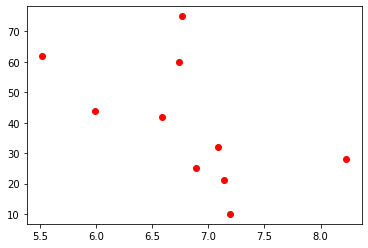

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np_pl_x,np_pl_y,'ro')
plt.show()

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
f = lagrange(np_pl_x, np_pl_y)

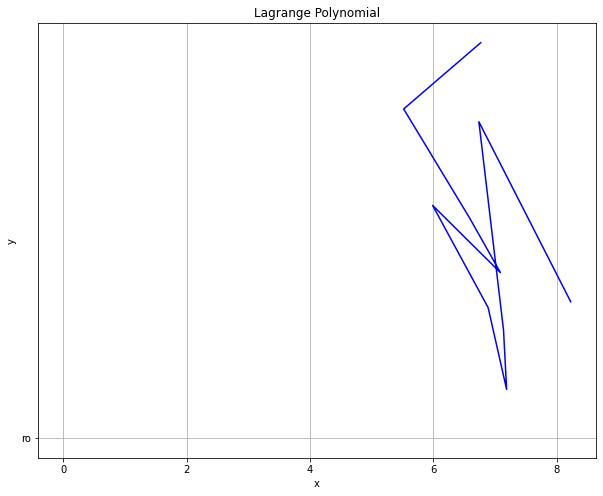

0.8011581420898437

In [ ]:
fig = plt.figure(figsize = (10,8))
plt.plot(np_pl_x, f(np_pl_x), 'b', 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
mean_squared_error(np_pl_y,f(np_pl_x))

0.8011581420898437

In [ ]:
f(np_pl_x)

array([74.51171875, 62.01757812, 41.46289062, 31.1796875 , 43.8359375 ,
       24.58984375,  9.17578125, 20.33007812, 59.61328125, 25.68945312])

In [ ]:
np_pl_y

array([75., 62., 42., 32., 44., 25., 10., 21., 60., 28.])

In [ ]:
reg = LinearRegression().fit(np_pl_x.reshape(-1,1), np_pl_y)

In [ ]:
reg.score(np_pl_x.reshape(-1,1), np_pl_y)
y_preds_sl = reg.predict(np_pl_x.reshape(-1,1))

mean_squared_error(np_pl_y,y_preds_sl)

269.85920495611765

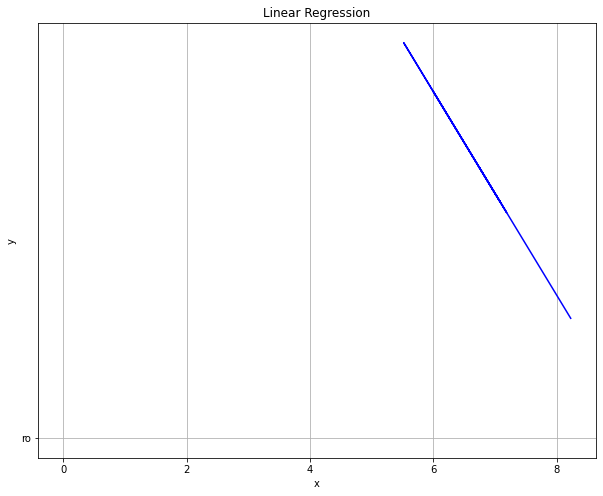

In [ ]:
fig = plt.figure(figsize = (10,8))
plt.plot(np_pl_x, y_preds_sl, 'b', 'ro')
plt.title('Linear Regression')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df_pl_sample_validation = df_pl.sample(n=10, random_state=1)
np_pl_x_valid = np.array(df_pl_sample_validation.iloc[:,0])
np_pl_y_valid = np.array(df_pl_sample_validation.iloc[:,1])

In [ ]:
y_preds_sl_valid = reg.predict(np_pl_x_valid.reshape(-1,1))

regres = mean_squared_error(np_pl_y_valid,y_preds_sl_valid)

lagrange = mean_squared_error(np_pl_y_valid,f(np_pl_x_valid))

print("Regression MSE: ")
print(regres)
print("Lagrangian Polynomial MSE: ")
print(lagrange)

Regression MSE: 
269.85920495611765
Lagrangian Polynomial MSE: 
0.8011581420898437
